In [2]:
import pandas as pd
import utils
pd.options.display.max_rows = 100000
pd.set_option('display.max_colwidth', -1)

PATH="C:/Users/bdolicki/Documents/Git/multilingual-analysis/code/analysing_predictions/udpos"

C:\Users\bdolicki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [27]:
# for some reason we dont have predictions when de, hu, jv, ka was the source language
all_langs = ['af', 'ar', 'bg', 'de', 'el', 'en', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'it', 'ja', 'jv', 'ka', 'kk', 'ko', 'ml', 'mr', 'ms', 'my', 'nl', 'pt', 'ru', 'sw', 'ta', 'te', 'th', 'tl', 'ur', 'vi', 'zh']
train_langs = ['af', 'ar', 'bg', 'el', 'en', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'he', 'hi', 'id', 'it', 'ja', 'ko', 'nl', 'pt', 'ru']
test_langs = train_langs

In [28]:
from collections import defaultdict
mistakes = defaultdict(dict)
all_examples = defaultdict(dict)


In [30]:
for test_lang in train_langs:
    most_mistaken_words = []
    most_mistaken_pos = []
    print("test",test_lang)
    for train_lang in test_langs:
#         print('train',train_lang)
        pa = utils.PredictionsAnalyzer()
        ud_pos = pa.read_tag_data(f"{PATH}/dev_sets/dev-{test_lang}.tsv",f"{PATH}/results/dev_{train_lang}_{test_lang}_predictions.txt")
        def is_pred_wrong(actual,pred=None):
            return actual!=pred

        mistakes_df, conf_df = pa.transform_data(is_pred_wrong,conf_matrix=True)
        mistakes[train_lang][test_lang] = mistakes_df
        conf_count = pd.DataFrame()
        conf_count["count"] = conf_df.sum().sort_values(ascending=False) 
        conf_count["percent"] = conf_count/conf_count.sum()
        
        sparse_conf_df = conf_df.reset_index().melt(id_vars="index",var_name="actual",value_name="count").rename(columns={"index":"pred"})
        sparse_conf_df["percent"] = sparse_conf_df["count"]/sparse_conf_df["count"].sum()
        sparse_conf_df = sparse_conf_df.sort_values(by="count",ascending=False)
#         if train_lang==test_lang:
#             print("Supervised")
#             display(conf_count[:5])
#         display(sparse_conf_df.head(5))
#             display(mistakes_df.token.value_counts()[:2])
        most_mistaken_words += list(mistakes_df.token.value_counts()[:2].index)
        most_mistaken_pos += [conf_count.index[0]]
        
        
#         def is_all(actual, pred=None):
#             return True
#         all_df, _ = pa.transform_data(is_all,conf_matrix=True)
#         all_examples[train_lang][test_lang] = all_df
#         rel = pd.DataFrame()
#         rel["% mistaken"] = mistakes_df.token.value_counts().divide(all_df.token.value_counts()).sort_values(ascending=False)
#         rel["all_count"] = all_df.token.value_counts()
#         rel["mistaken_count"] = mistakes_df.token.value_counts()
#         rel = rel.dropna()
#         display(rel[rel.all_count>5].sort_values(by=["% mistaken","all_count"],ascending=False).head())
    print("Zero-shot")
    display(pd.Series(most_mistaken_words).value_counts()[:5])
    display(pd.Series(most_mistaken_pos).value_counts()[:5])

# mistaken die: ar, bg? (40%), et, fi, he, id, ja, ko, 
# not mistaken die: el, en, es, eu, fa, fr, hi, it, nl, pt, ru

test af
Zero-shot


te     12
die    8 
van    4 
nie    4 
wat    3 
dtype: int64

DET     6
PART    6
ADP     4
PRON    3
ADV     1
dtype: int64

test ar
Zero-shot


ان      14
التي    13
من      5 
في      4 
الذي    2 
dtype: int64

NOUN    15
X       3 
ADP     2 
dtype: int64

test bg
Zero-shot


да    14
се    11
на    6 
не    5 
е     1 
dtype: int64

ADP      6
ADJ      5
AUX      4
PROPN    2
PRON     2
dtype: int64

test el
Zero-shot


του       12
να        8 
την       7 
της       7 
Κάστρο    1 
dtype: int64

DET     15
NOUN    3 
ADP     1 
ADJ     1 
dtype: int64

test en
Zero-shot


to     14
the    9 
of     6 
a      3 
's     3 
dtype: int64

ADP      5
PART     5
DET      3
NOUN     2
PROPN    2
dtype: int64

test es
Zero-shot


la      9
de      8
que     7
el      4
como    4
dtype: int64

ADP      8
PROPN    6
DET      4
NOUN     1
SCONJ    1
dtype: int64

test et
Zero-shot


ei     12
on     6 
ka     5 
et     4 
oma    3 
dtype: int64

NOUN     9
ADV      6
ADJ      2
PROPN    2
VERB     1
dtype: int64

test eu
Zero-shot


ez      13
zuen    13
du      6 
da      3 
ere     3 
dtype: int64

AUX      12
NOUN     4 
VERB     2 
PROPN    2 
dtype: int64

test fa
Zero-shot


را     15
که     12
به     5 
در     4 
است    2 
dtype: int64

NOUN    19
ADP     1 
dtype: int64

test fi
Zero-shot


on      17
ei      14
että    2 
oli     2 
niin    2 
dtype: int64

VERB    7
AUX     5
NOUN    4
ADV     2
ADJ     1
dtype: int64

test fr
Zero-shot


_      20
de     10
la     4 
euh    2 
est    2 
dtype: int64

NOUN    10
ADP     8 
DET     2 
dtype: int64

test he
Zero-shot


את     14
לא     6 
של     6 
על     3 
אחד    3 
dtype: int64

NOUN     15
ADP      4 
PROPN    1 
dtype: int64

test hi
Zero-shot


के    12
को    10
की    7 
ने    5 
है    3 
dtype: int64

ADP      17
PROPN    3 
dtype: int64

test id
Zero-shot


ini       15
yang      8 
itu       5 
di        4 
dengan    1 
dtype: int64

PROPN    13
ADP      4 
NOUN     3 
dtype: int64

test it
Zero-shot


di       7
@user    6
il       6
che      4
del      4
dtype: int64

ADP     10
NOUN    3 
DET     3 
SYM     2 
ADJ     1 
dtype: int64

test ja
Zero-shot


の     19
に     18
は     1 
楽天    1 
し     1 
dtype: int64

ADP     16
NOUN    4 
dtype: int64

test ko
Zero-shot


있다     20
수      17
것이다    2 
이런     1 
dtype: int64

NOUN    14
ADV     3 
VERB    3 
dtype: int64

test nl
Zero-shot


de      10
van     6 
te      6 
zijn    6 
er      3 
dtype: int64

ADJ      6
PROPN    5
ADP      4
DET      4
ADV      1
dtype: int64

test pt
Zero-shot


que    11
de     7 
a      5 
o      4 
do     4 
dtype: int64

ADP      9
PROPN    7
DET      2
NOUN     1
VERB     1
dtype: int64

test ru
Zero-shot


и      14
не     12
в      5 
как    4 
что    3 
dtype: int64

PART     9
ADP      5
ADJ      2
PROPN    2
NOUN     1
dtype: int64

(0.0, 10.0)

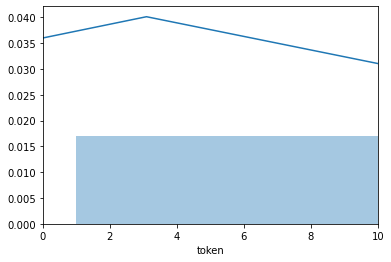

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(all_examples['af']['en'].token.value_counts())
plt.xlim((0,10))

In [24]:
all_examples['ko']['ko'].token.value_counts()[:10]

.     2667
,     931 
있다    280 
수     246 
'     191 
이     164 
있는    162 
그     157 
(     145 
)     145 
Name: token, dtype: int64

In [21]:
s1 = pd.Series({'eagle': 160.0, 'falcon': 330.0})
s2 = pd.Series({'falcon': 345.0, 'eagle': 200.0, 'duck': 30.0})
s1.divide(s2)

duck     NaN      
eagle     0.800000
falcon    0.956522
dtype: float64

In [24]:
s1

eagle     160.0
falcon    330.0
dtype: float64

In [164]:
mistakes_df.columns

Index(['predicted', 'actual', 'token', 'sentence', 'actual_tokens'], dtype='object')

In [165]:
mistakes_df = mistakes['et']['el']
mistakes_df[mistakes_df['actual']=='DET']

KeyError: 'el'

In [78]:
mistakes_df.token.value_counts()

te                        104
nie                       74 
hierdie                   72 
om                        49 
'n                        46 
se                        33 
ander                     18 
as                        13 
Hierdie                   12 
sodanige                  11 
van                       9  
alle                      8  
geen                      8  
Crime                     7  
wanneer                   7  
GCIS                      6  
het                       6  
Madiba                    6  
/                         6  
Stop                      5  
in                        5  
soos                      5  
uit                       5  
derde                     5  
probeer                   5  
mnr                       4  
onderhewig                4  
af                        4  
egter                     4  
Alle                      4  
meer                      4  
daardie                   3  
al                        3  
na        

In [100]:
all_df = all_examples['af']['ar']

In [101]:
all_df[all_df.token=='أن'].actual.value_counts()

CCONJ    148
Name: actual, dtype: int64